In [1]:
%matplotlib inline
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn.linear_model as linear_model
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import KFold
from IPython.display import HTML, display
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


pd.options.display.max_rows = 1000
pd.options.display.max_columns = 20


In [2]:
import warnings

# 경고 무시하기
warnings.filterwarnings("ignore")
# unicode minus를 사용하지 않기 위한 설정 (minus 깨짐현상 방지)
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'

In [3]:
df = pd.read_csv('강남구전세데이터_찐마지막.csv')

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87361 entries, 0 to 87360
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   AD_Code         87361 non-null  int64  
 1   Admin_District  87361 non-null  object 
 2   Area            87361 non-null  float64
 3   YearBuilt       87361 non-null  int64  
 4   Type            87361 non-null  object 
 5   Floor           87361 non-null  float64
 6   Address         87361 non-null  object 
 7   Cont_Date       87361 non-null  object 
 8   Age             87361 non-null  int64  
 9   Latitude        87361 non-null  float64
 10  Longitude       87361 non-null  float64
 11  Star_Cnt        87361 non-null  int64  
 12  Michelin_Cnt    87361 non-null  int64  
 13  Mc_cnt          87361 non-null  int64  
 14  Bigstore_cnt    87361 non-null  int64  
 15  InterestRate    87361 non-null  float64
 16  Market_cnt      87361 non-null  int64  
 17  Subway_cnt      87361 non-null 

In [5]:
print(df.describe())
print(df.describe(include='object'))

            AD_Code          Area     YearBuilt         Floor           Age  \
count  87361.000000  87361.000000  87361.000000  87361.000000  87361.000000   
mean       5.422694     67.776567   2000.491901      6.859915     22.508099   
std        4.148519     37.183271     12.485836      5.758265     12.485836   
min        0.000000     11.390000   1972.000000     -1.000000      0.000000   
25%        2.000000     40.560000   1992.000000      3.000000     10.000000   
50%        4.000000     59.920000   2002.000000      5.000000     21.000000   
75%        9.000000     84.930000   2013.000000     10.000000     31.000000   
max       13.000000    301.470000   2023.000000     67.000000     51.000000   

           Latitude     Longitude      Star_Cnt  Michelin_Cnt        Mc_cnt  \
count  87361.000000  87361.000000  87361.000000  87361.000000  87361.000000   
mean      37.498124    127.057102      2.651034      1.253111      0.343162   
std        0.015544      0.022320      2.424018    

In [6]:
# (선택) 결측치 확인
print(df.isnull().sum())

# 결측치 처리 (예시: 평균값으로 대체)
df.fillna(df.mean(), inplace=True)

AD_Code           0
Admin_District    0
Area              0
YearBuilt         0
Type              0
Floor             0
Address           0
Cont_Date         0
Age               0
Latitude          0
Longitude         0
Star_Cnt          0
Michelin_Cnt      0
Mc_cnt            0
Bigstore_cnt      0
InterestRate      0
Market_cnt        0
Subway_cnt        0
Kinder_cnt        0
y                 0
dtype: int64


In [7]:
df

,AD_Code,Admin_District,Area,YearBuilt,Type,Floor,Address,Cont_Date,Age,Latitude,Longitude,Star_Cnt,Michelin_Cnt,Mc_cnt,Bigstore_cnt,InterestRate,Market_cnt,Subway_cnt,Kinder_cnt,y
0,0,개포동,44.00,1989,단독다가구,3.0,서울특별시 강남구 논현로4길,2022-06-01,34,37.473722,127.052725,0,0,0,0,4.04,0,0,2,7500
1,0,개포동,44.00,1991,단독다가구,3.0,서울특별시 강남구 논현로4길,2022-10-05,32,37.473722,127.052725,0,0,0,0,4.82,0,0,2,14333
2,0,개포동,44.00,1991,단독다가구,3.0,서울특별시 강남구 논현로4길,2022-07-07,32,37.473722,127.052725,0,0,0,0,4.16,0,0,2,17115
3,0,개포동,44.00,1991,단독다가구,3.0,서울특별시 강남구 논현로4길,2022-07-07,32,37.473722,127.052725,0,0,0,0,4.16,0,0,2,17640
4,0,개포동,44.00,1989,단독다가구,3.0,서울특별시 강남구 논현로4길,2022-06-01,34,37.473722,127.052725,0,0,0,0,4.04,0,0,2,7500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87356,2,대치동,66.64,2004,오피스텔,8.0,서울특별시 강남구 역삼로 432,2019-07-22,19,37.501439,127.054330,3,1,1,1,2.64,0,0,1,45000
87357,13,청담동,43.68,2005,오피스텔,5.0,서울특별시 강남구 압구정로 461,2019-06-21,18,37.525283,127.047239,3,17,0,2,2.74,0,0,1,38000
87358,13,청담동,31.57,2014,오피스텔,5.0,서울특별시 강남구 도산대로 406,2019-07-20,9,37.522821,127.039963,3,31,1,2,2.64,0,0,0,23500
87359,0,개포동,29.51,2020,오피스텔,6.0,서울특별시 강남구 논현로20길 12,2020-09-08,3,37.478097,127.045854,1,0,0,0,2.44,0,0,1,3000


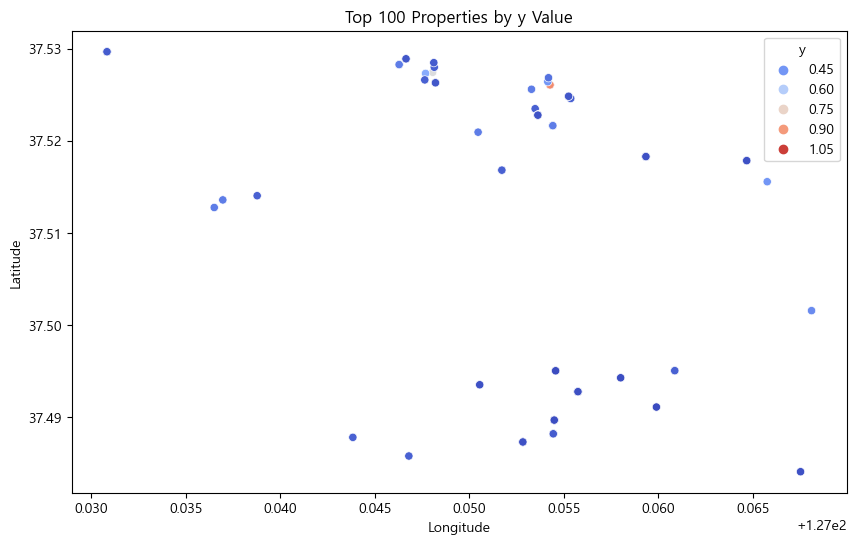

In [8]:
# 'y' 값이 가장 큰 상위 100개의 데이터를 선택
top_100 = df.nlargest(100, 'y')

# 상위 100개 데이터의 시각화 예시
plt.figure(figsize=(10, 6))
sns.scatterplot(data=top_100, x='Longitude', y='Latitude', hue='y', palette='coolwarm')
plt.title('Top 100 Properties by y Value')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='y')
plt.show()

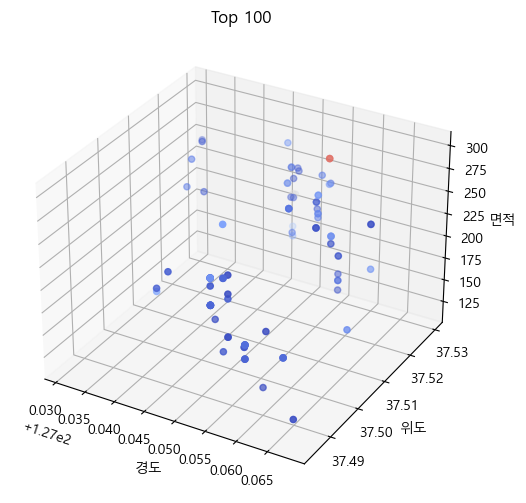

In [9]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(top_100['Longitude'], top_100['Latitude'], top_100['Area'], c=top_100['y'], cmap='coolwarm')
ax.set_xlabel('경도')
ax.set_ylabel('위도')
ax.set_zlabel('면적')
plt.title('Top 100')
plt.show()

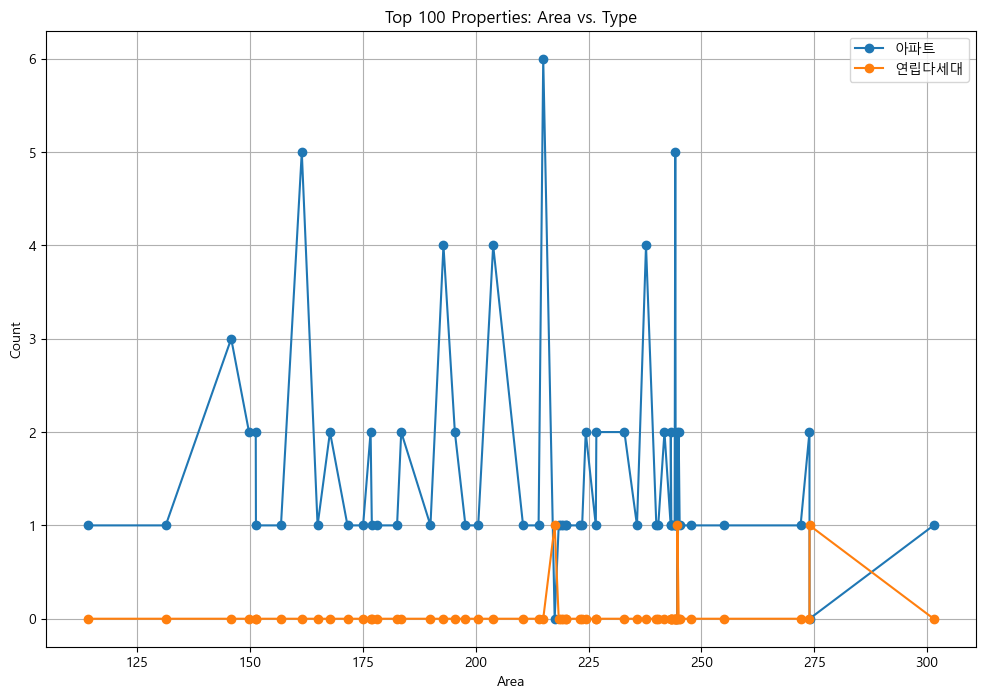

In [10]:
# Top 100 데이터 추출
top_100_df = df.nlargest(100, 'y')

# Area(면적)와 Type(형태) 분석
area_type_analysis = top_100_df.groupby(['Area', 'Type']).size().unstack(fill_value=0)

# 면적별 각 형태의 분포 시각화
plt.figure(figsize=(12, 8))

for col in area_type_analysis.columns:
    plt.plot(area_type_analysis.index, area_type_analysis[col], marker='o', label=col)

plt.title('Top 100 Properties: Area vs. Type')
plt.xlabel('Area')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()

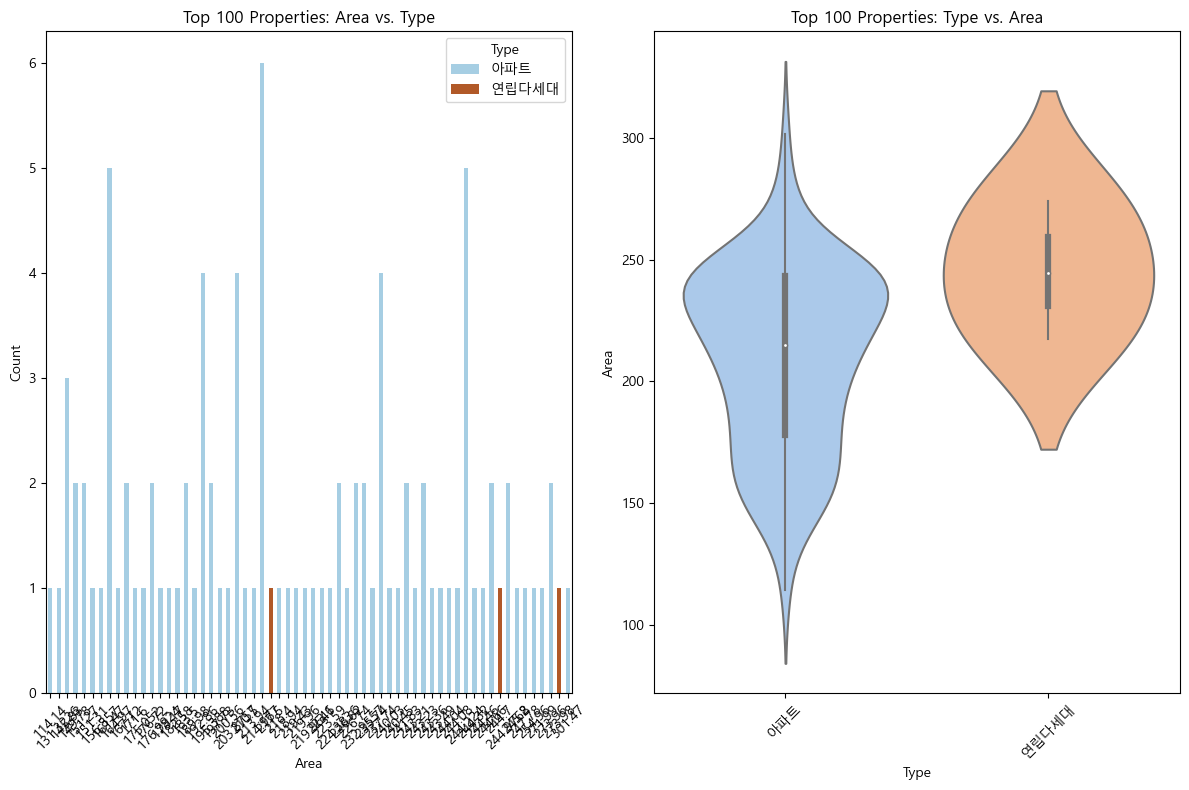

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정 (Windows 환경)
plt.rc('font', family='Malgun Gothic')

# Top 100 데이터 추출
top_100_df = df.nlargest(100, 'y')

# Area(면적)와 Type(형태) 분석
area_type_analysis = top_100_df.groupby(['Area', 'Type']).size().unstack(fill_value=0)

# 시각화
plt.figure(figsize=(12, 8))

# 막대 그래프
plt.subplot(1, 2, 1)
area_type_analysis.plot(kind='bar', stacked=True, colormap='Paired', ax=plt.gca())
plt.title('Top 100 Properties: Area vs. Type')
plt.xlabel('Area')
plt.ylabel('Count')
plt.xticks(rotation=45)

# 바이올린 플롯
plt.subplot(1, 2, 2)
sns.violinplot(data=top_100_df, x='Type', y='Area', palette='pastel')
plt.title('Top 100 Properties: Type vs. Area')
plt.xlabel('Type')
plt.ylabel('Area')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

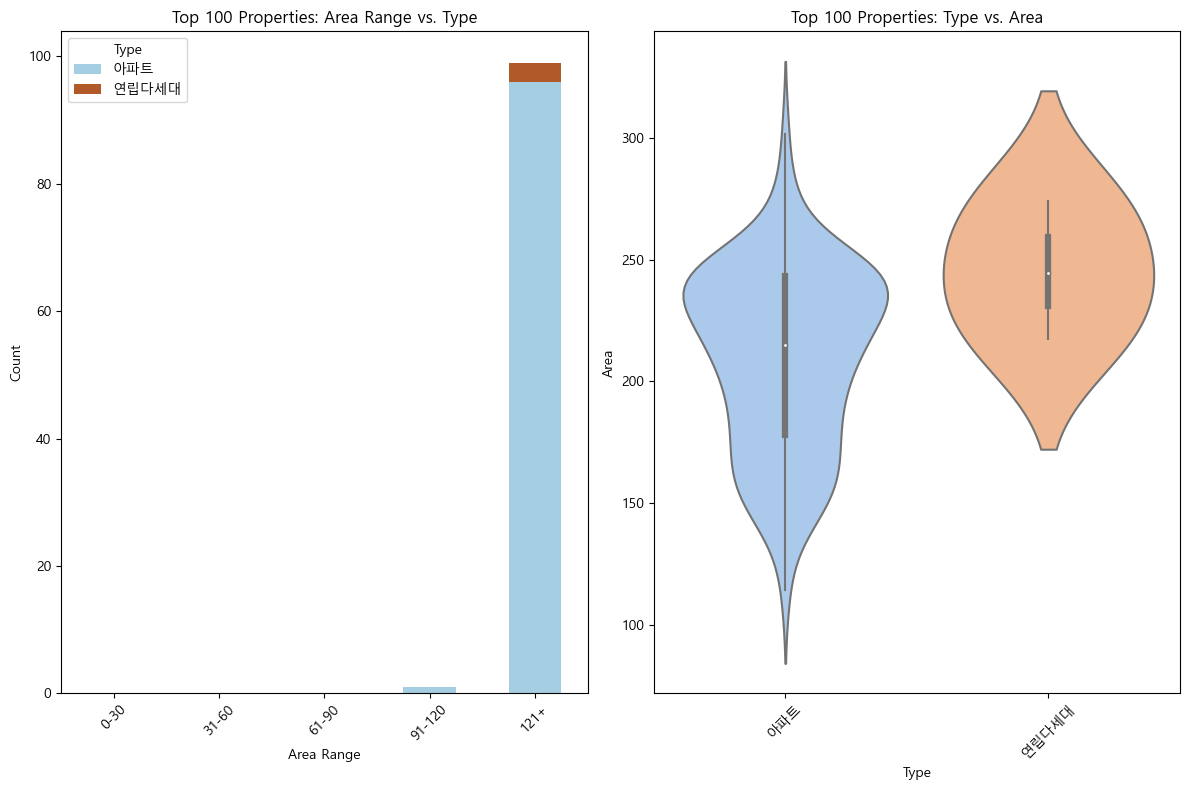

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정 (Windows 환경)
plt.rc('font', family='Malgun Gothic')

# Top 100 데이터 추출
top_100_df = df.nlargest(100, 'y')

# 범위를 정의하고 "Area_Range" 열 생성
bins = [0, 30, 60, 90, 120, float('inf')]
labels = ['0-30', '31-60', '61-90', '91-120', '121+']
top_100_df['Area_Range'] = pd.cut(top_100_df['Area'], bins=bins, labels=labels, right=False)

# Area(면적)와 Type(형태) 분석
area_type_analysis = top_100_df.groupby(['Area_Range', 'Type']).size().unstack(fill_value=0)

# 시각화
plt.figure(figsize=(12, 8))

# 막대 그래프
plt.subplot(1, 2, 1)
area_type_analysis.plot(kind='bar', stacked=True, colormap='Paired', ax=plt.gca())
plt.title('Top 100 Properties: Area Range vs. Type')
plt.xlabel('Area Range')
plt.ylabel('Count')
plt.xticks(rotation=45)

# 바이올린 플롯
plt.subplot(1, 2, 2)
sns.violinplot(data=top_100_df, x='Type', y='Area', palette='pastel')
plt.title('Top 100 Properties: Type vs. Area')
plt.xlabel('Type')
plt.ylabel('Area')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# 가격이 Top 100 인 타깃은 면적이 큰게 어떻게보면 당연하다.
## top100의 대부분이 120+에 분포되어있는것을 확인할 수 있었다.
# 타입은 아파트형식과 연립다세대 형식을 확인해봤다.
## 아파트가 100-300정도로 분포가 넓고 연립다세대는 200-300정도로 분포되어있는것을 확인했다.

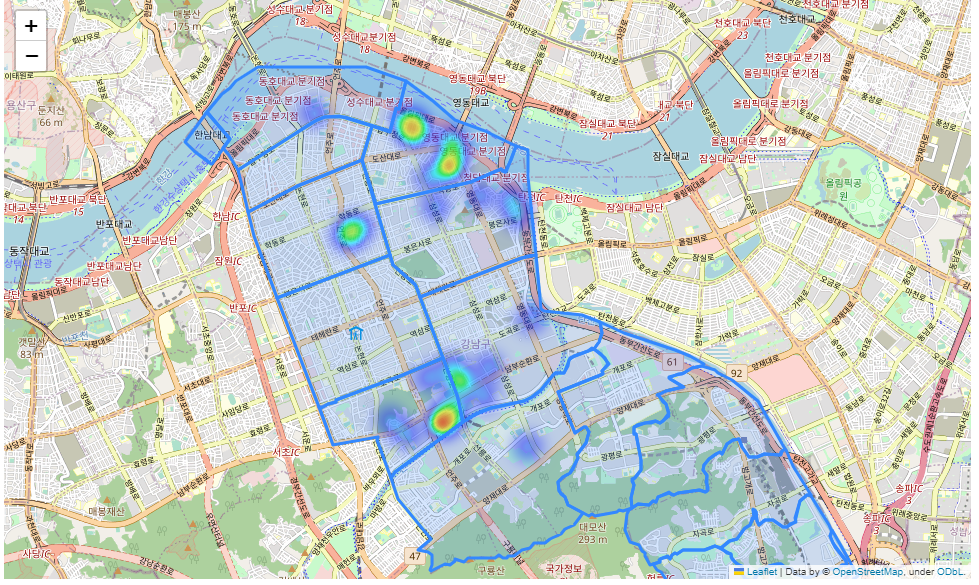

# 순위별 실제 건물 TOP5에 대해 알아보자.
## 1위.상지리츠빌카일룸2차 (110억)
서울 강남구 청담동
2006년 입주 (11년차)
면적 1개 (244.32 ~ 244.32m²)
 
## 2위. BRUNNEN청담 (71억)
서울 강남구 청담동
2019년 입주 (4년차)
면적 6개 (190.33 ~ 239.47m²)

## 3위. 마크힐스2단지 (62억)
서울 강남구 청담동
2010년 입주 (7년차)
면적 1개 (183.5 ~ 183.5m²)

## 4위.타워팰리스 (48억)
서울 강남구 도곡동
2002년 입주 (15년차)
면적 11개 (78.99 ~ 244.66m²)

## 5위. 라테라스 청담 (45억)
서울 강남구 청담동
2018년 입주 (-1년차)
면적 5개 (18.55 ~ 39.91m²)

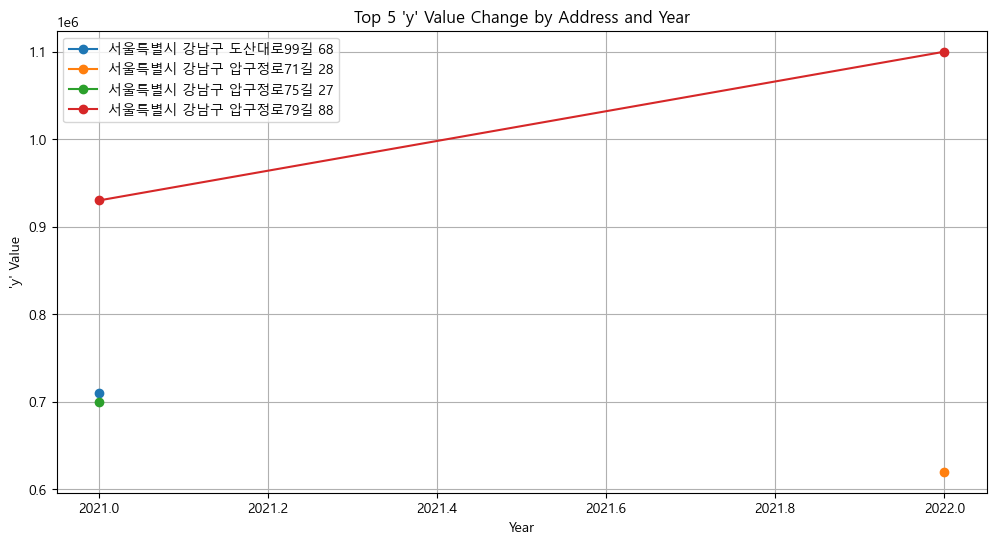

In [22]:
# 그래프는 빼는거루...

# import matplotlib.pyplot as plt
# import pandas as pd

# # 데이터 프레임에서 'y' 열이 top 5인 데이터 선택
# top5_data = df.nlargest(5, 'y')

# # 'Cont_Date' 열을 날짜 형식으로 변환
# top5_data['Cont_Date'] = pd.to_datetime(top5_data['Cont_Date'])

# # 'Cont_Date' 열에서 연도만 추출하여 'Year' 열 생성
# top5_data['Year'] = top5_data['Cont_Date'].dt.year

# # 그래프 그리기
# plt.figure(figsize=(12, 6))

# # 'Address'를 x축으로, 'Year'를 y축으로 해서 그래프 생성
# for address, group in top5_data.groupby('Address'):
#     plt.plot(group['Year'], group['y'], marker='o', label=address)

# plt.title("Top 5 'y' Value Change by Address and Year")
# plt.xlabel('Year')
# plt.ylabel("'y' Value")
# plt.legend()
# plt.grid(True)
# plt.show()